In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
quicksort_df = pd.read_csv('../Homeworks_07112024/measurements_1513.csv')
quicksort_df

,Size,Type,Time
0,70000,Sequential,0.022208
1,70000,Parallel,0.457282
2,70000,Built-in,0.037789
3,300,Sequential,0.000168
4,300,Parallel,0.062361
...,...,...,...
445,500000,Parallel,0.180554
446,500000,Built-in,0.136396
447,90000,Sequential,0.026489
448,90000,Parallel,0.161370


In [3]:
quicksort_df = pd.get_dummies(quicksort_df, columns=['Type'])
quicksort_df

,Size,Time,Type_Built-in,Type_Parallel,Type_Sequential
0,70000,0.022208,False,False,True
1,70000,0.457282,False,True,False
2,70000,0.037789,True,False,False
3,300,0.000168,False,False,True
4,300,0.062361,False,True,False
...,...,...,...,...,...
445,500000,0.180554,False,True,False
446,500000,0.136396,True,False,False
447,90000,0.026489,False,False,True
448,90000,0.161370,False,True,False


In [4]:
quicksort_df['Type_Built-in'] = quicksort_df['Type_Built-in'].astype(int)
quicksort_df['Type_Parallel'] = quicksort_df['Type_Parallel'].astype(int)
quicksort_df['Type_Sequential'] = quicksort_df['Type_Sequential'].astype(int)

In [34]:
X = quicksort_df.drop(columns=['Time'])
y = quicksort_df['Time']

In [35]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X, y)

LinearRegression()

In [36]:
y_pred = linear_regression_model.predict(X)
residuals = y - y_pred

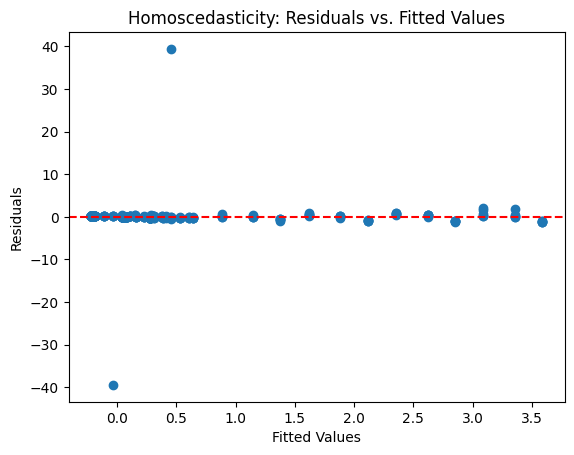

In [37]:
plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity: Residuals vs. Fitted Values")
plt.show()

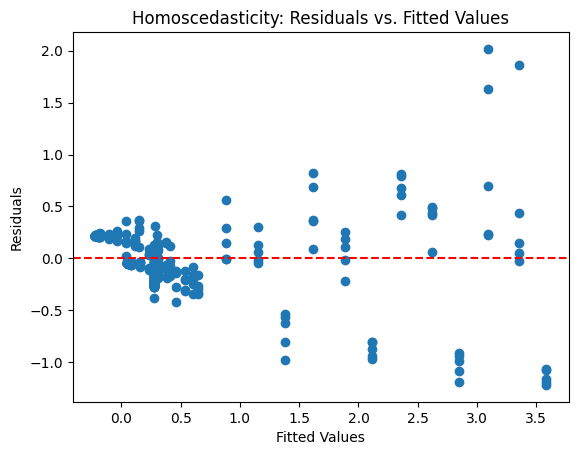

In [42]:
non_outlier_index = [i for i, v in enumerate(residuals) if abs(float(v)) < 5]

plt.figure()
plt.scatter(y_pred[non_outlier_index], residuals[non_outlier_index])
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity: Residuals vs. Fitted Values")
plt.show()